## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Load Dataset

In [2]:
df = pd.read_csv('dataset3.csv')

df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Data Preprocessing

In [3]:
df.dropna(axis=1)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [4]:
#Removing null values
df.dropna(inplace=True)

In [5]:
#Function to remove all unwanted characters in our data
def clean(text):
    text = re.sub(r'http://S+|https://S+',' ',text)
    text = re.sub("[^a-zA-Z]+"," ",text)
    text = re.sub(" s "," ",text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"rt ", "", text)
    text = text.lower()
    text = text.lstrip().rstrip()
    return text

In [6]:
cleaned_df = [clean(text) for text in df["text"]]

In [7]:
print(cleaned_df[1:100])

['when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain some of the strong points of the first movie awsome animation good flowing story excellent voice cast funny comedy and a kick ass soundtrack but to my disappointment not any of this is to be found in atlantis milo return had i read some reviews first i might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentioned br br when the first scene appears your in for a shock if you just picked atlantis milo return from the display case at your local videoshop or whatever and had the expectations i had the music feels as a bad imitation of the first movie and the voice cast has been replaced by a not so fitting one with the exception of a few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is a 

## Tokenisation

In [8]:
x = [nltk.word_tokenize(w) for w in cleaned_df]

## Lemmatization

In [9]:
lemma = WordNetLemmatizer()
lemmatized = [[lemma.lemmatize(w) for w in text] for text in x]

## Removal of Stopwords

In [ ]:
without_stopwords = [[w for w in text if w not in stopwords.words('english')] for text in lemmatized]

## Vectorization

In [ ]:
vectorizer = CountVectorizer(max_features=20000,analyzer='word',stop_words = 'english')
X = vectorizer.fit_transform([' '.join(text) for text in without_stopwords]).toarray()

## Data Summarization

In [ ]:
df.describe()

In [ ]:
df['label'].value_counts()

In [ ]:
df.info()

In [ ]:
print(df.isnull().sum())

## Data Visualization

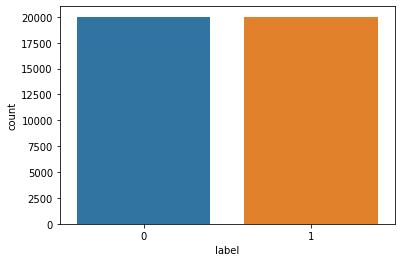

In [23]:
sns.countplot(x='label',data = df)
plt.show()

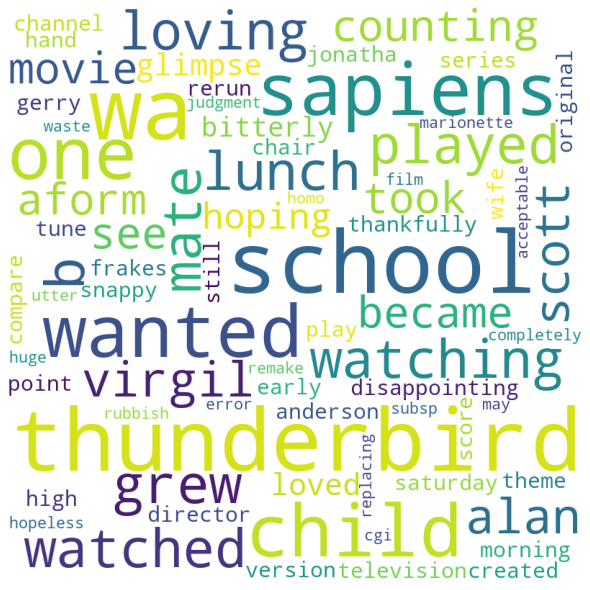

In [22]:
w = [' '.join(text) for text in without_stopwords]
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(w[0])
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
unclean = [len(x) for x in df["text"]]
clean = [len(y) for y in w]

n_groups = 20
a = unclean[:20]
b = clean[:20]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, a, bar_width,
                    alpha=opacity,  
                    color='b',
                    label='Unclean')

rects2 = plt.bar(index + bar_width, b, bar_width, 
                    alpha=opacity,  
                    color='g',  
                    label='Clean')

plt.xlabel('Content')
plt.ylabel('Length')
plt.title('Length of content before vs after cleaning')
plt.legend()

In [ ]:
def top_words(cleaned_df):
    # create a dictionary to store the words and their frequency
    word_dict = {}
    for text in cleaned_df:
        for word in text.split():
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1
    # sort the dictionary by values
    sorted_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
    # get the top 20 words
    top_words = sorted_dict[:20]
    # get the top 20 words and their frequency
    top_words, top_freq = zip(*top_words)
    # plot the top 20 words and their frequency
    plt.figure(figsize=(10, 5))
    plt.bar(top_words, top_freq)
    plt.title('Top 20 words in the dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

top_words(cleaned_df)

In [ ]:
# save list to csv file
def save_list(without_stopwords, cleaneddataset1):
    # convert list to dataframe
    df = pd.DataFrame(without_stopwords)
    # save to csv file
    df.to_csv(cleaneddataset1, index= False)

In [ ]:
save_list(w, 'cleaneddataset3.csv')